In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fftpack
import math

def fft(t, x):
    # Number of samplepoints
    N = len(x)
    # sample spacing
    T = t[1] - t[0] # constant spacing
    # x = np.linspace(0.0, N*T, N)
    # y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
    yf = scipy.fftpack.fft(x)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    a = 2.0/N * np.abs(yf[:N//2])
    i = np.argmax(a)
    # return xf[i]
    

    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.show()

## Konstanten

In [95]:
s_z = 0.003
s_u = 0.2

## Lecherleitung

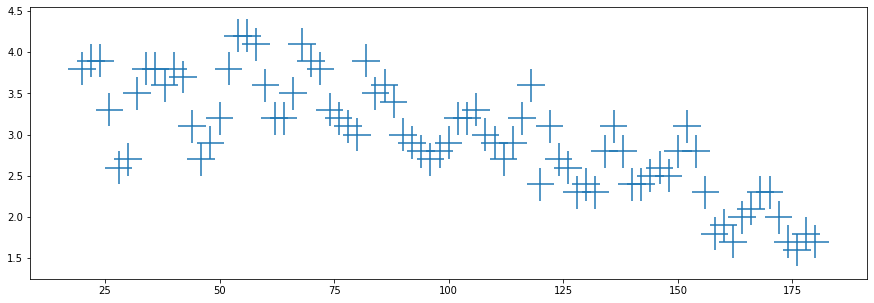

In [96]:
df_ll = pd.read_csv("./lecherleitung.csv", sep=";")
plt.figure(figsize=(15, 5))
plt.errorbar(df_ll["z"].values, df_ll["U"].values, yerr=s_u, xerr=s_z*1000, fmt=",")
plt.show()

In [80]:
from scipy.optimize import curve_fit

def sin_func(x, a, b, c, d, e):
    return a * np.sin(b * x + c) + (d * x + e)

def lin_func(x, a, b):
    return (a * x + b)

x = df_ll["z"].values
y = df_ll["U"].values
popt, pcov = curve_fit(sin_func, x, y)
lin_popt, lin_pcov = curve_fit(lin_func, x, y)


popt

array([-0.06223733,  1.07055596, -8.04920291, -0.01117144,  4.09081353])

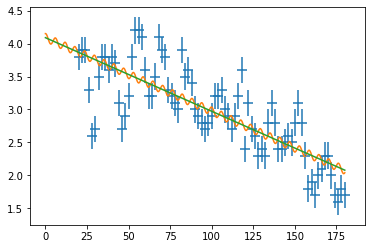

In [81]:
X = np.linspace(0, 180, 1000)
Y = sin_func(X, *popt)
lin_Y = lin_func(X, *lin_popt)

plt.errorbar(x, y, yerr=0.2, xerr=3, fmt=",")

plt.plot(X, Y)
plt.plot(X, lin_Y)

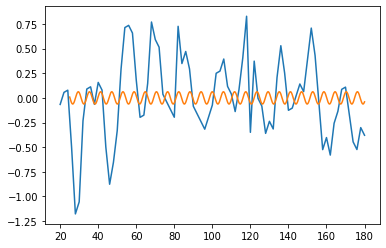

In [90]:
y_bar = y - lin_func(x, *lin_popt)
plt.plot(x, y_bar)

def sin_func(x, a, b, c):
    return a * np.sin(b * x + c)

popt, pcov = curve_fit(sin_func, x, y_bar)
X = np.linspace(25, 180, 1000)
Y = sin_func(X, *popt)
plt.plot(X, Y)

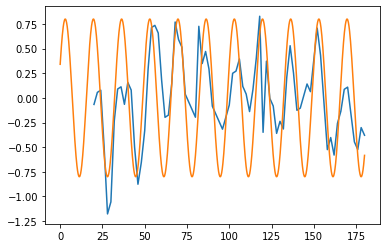

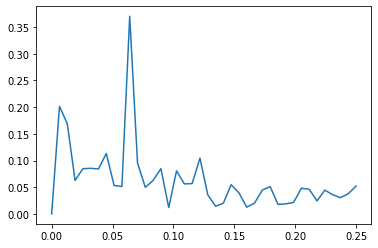

In [85]:
y_bar = y - lin_func(x, *lin_popt)
plt.plot(x, y_bar)
X_hat = np.linspace(0, 180, 1000)
plt.plot(X_hat, np.cos((X_hat - 3) * 2 * np.pi * 0.06) * 0.8)

fft(x, y_bar)

## Mikrowellenmessung

In [74]:
df_m = pd.read_csv("./mikrowelle.csv", sep=";")

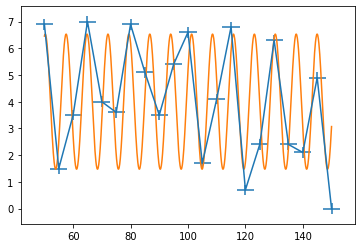

In [75]:
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d
x = df_m["z"].values
y = df_m["U"].values
popt, pcov = curve_fit(func, x, y)

X = np.linspace(50, 150, 1000)
Y = func(X, *popt)
plt.errorbar(x, y, yerr=0.2, xerr=3)

plt.plot(X, Y)

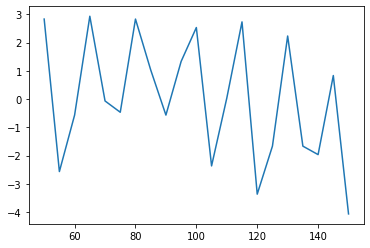

In [76]:
y_bar = y - np.mean(y)
plt.plot(x, y_bar)
plt.show()

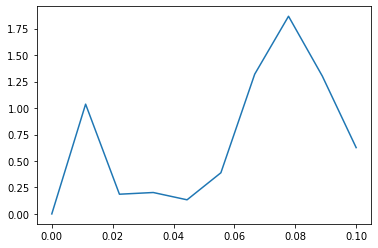

In [77]:
fft(x, y_bar)

## Brechungsindex PVC Platte

In [99]:
df_pvc = pd.read_csv("./pvc.csv", sep=";")
df_pvc["dz"] = df_pvc["z_2"] - df_pvc["z_1"]
dz_mean = np.mean(df_pvc["dz"].values) / 1000
dz_mean 

0.013333333333333334

\begin{equation}
    n = \frac{\lambda_0}{\lambda_0 + \Delta z}
\end{equation}

0.18666666666666668